In [1]:
from __future__ import annotations
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../src/")

from utils import *

import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import plotly.graph_objects as go
import datetime
import plotly.express as px


pd.set_option('display.max_columns', None)

### LOADING DATA FOR VISUALISATION

In [2]:
path = "../data/dataset_viz.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

grav  senc  catv  obs  obsm  choc  catr  circ  nbv  vosp  prof  plan  surf  \
0   1.0   1.0   1.0  0.0   2.0   1.0   4.0   2.0  3.0   1.0   1.0   1.0   1.0   
1   1.0   3.0   3.0  0.0   2.0   8.0   4.0   2.0  0.0   1.0   1.0   1.0   1.0   
2   1.0   3.0   3.0  0.0   2.0   0.0   4.0   1.0  2.0   1.0   1.0   1.0   1.0   
3   1.0   3.0   3.0  0.0   2.0   1.0   4.0   2.0  2.0   1.0   1.0   1.0   1.0   
4   1.0   3.0   3.0  0.0   2.0   3.0   3.0   2.0  2.0   0.0   1.0   1.0   1.0   

   infra  situ  lum  int  atm  col   com        lat      long   dep  obs2  \
0    0.0   1.0  1.0  0.0  1.0  1.0  34.0  43.624364  3.836504  34.0   0.0   
1    5.0   1.0  1.0  0.0  1.0  1.0  67.0  48.609460  7.765255  67.0   0.0   
2    0.0   5.0  1.0  2.0  1.0  6.0  75.0  48.821211  2.334312  75.0   0.0   
3    0.0   5.0  1.0  1.0  1.0  6.0  75.0  48.821209  2.334299  75.0   0.0   
4    0.0   1.0  1.0  2.0  1.0  3.0  69.0  45.801517  4.838361  69.0   0.0   

   obsm2  choc2  is_in_agg  distance_to_infra  infra_index  code_com_d  \
0    2.0    1.0        1.0           3.545394       3106.0        34.0   
1    1.0    3.0        1.0           0.987745       5871.0        67.0   
2    2.0    5.0        1.0           7.035072       9188.0        75.0   
3    2.0    5.0        1.0           6.466617       9188.0        75.0   
4    2.0    1.0        1.0           8.932172       9090.0        75.0   

   latitude_dep  longitude_dep  latitude_fin  longitude_fin        date  \
0     43.674616       4.118265     43.674244       4.116554  2019-08-06   
1     48.746297       7.559255     48.746754       7.560760  2019-05-29   
2     48.827191       2.385243     48.827178       2.385217  2020-09-16   
3     48.827191       2.385243     48.827178       2.385217  2021-12-17   
4     48.845519       2.355970     48.844884       2.356884  2020-09-02   

     date_maj           ame_d                                       adr  \
0  2020-01-11  PISTE CYCLABLE                      ALCO (ROND-POINT D')   
1  2020-06-08  PISTE CYCLABLE                           MARAIS (RUE DU)   
2  2022-11-06  PISTE CYCLABLE                        AVENUE DAVID WEILL   
3  2022-11-06  PISTE CYCLABLE                        AVENUE DAVID WEILL   
4  2022-03-02           AUCUN  RAOUL CARRIE                        (QU)   

   day_of_week  
0            1  
1            2  
2            2  
3            4  
4            2

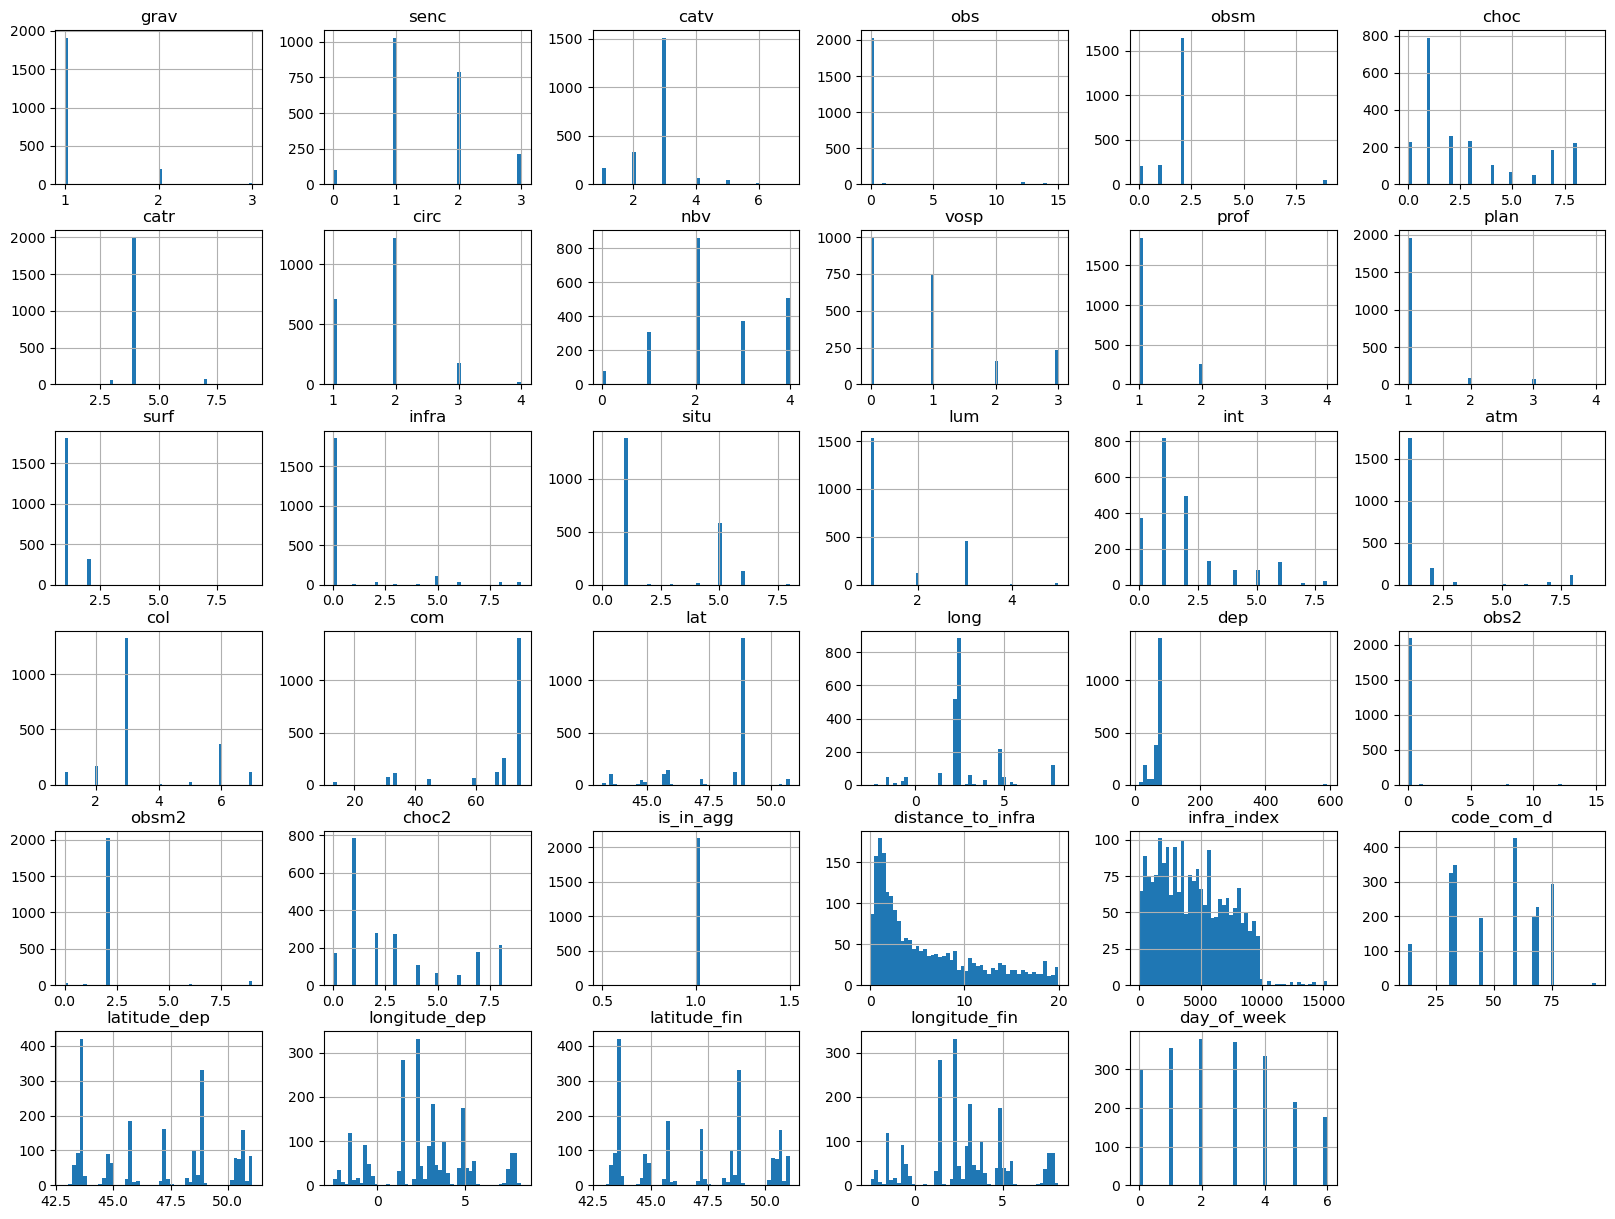

In [5]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

C:\Users\coco8\AppData\Local\Temp\ipykernel_2784\3286303962.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df_copy.corr(method='pearson')


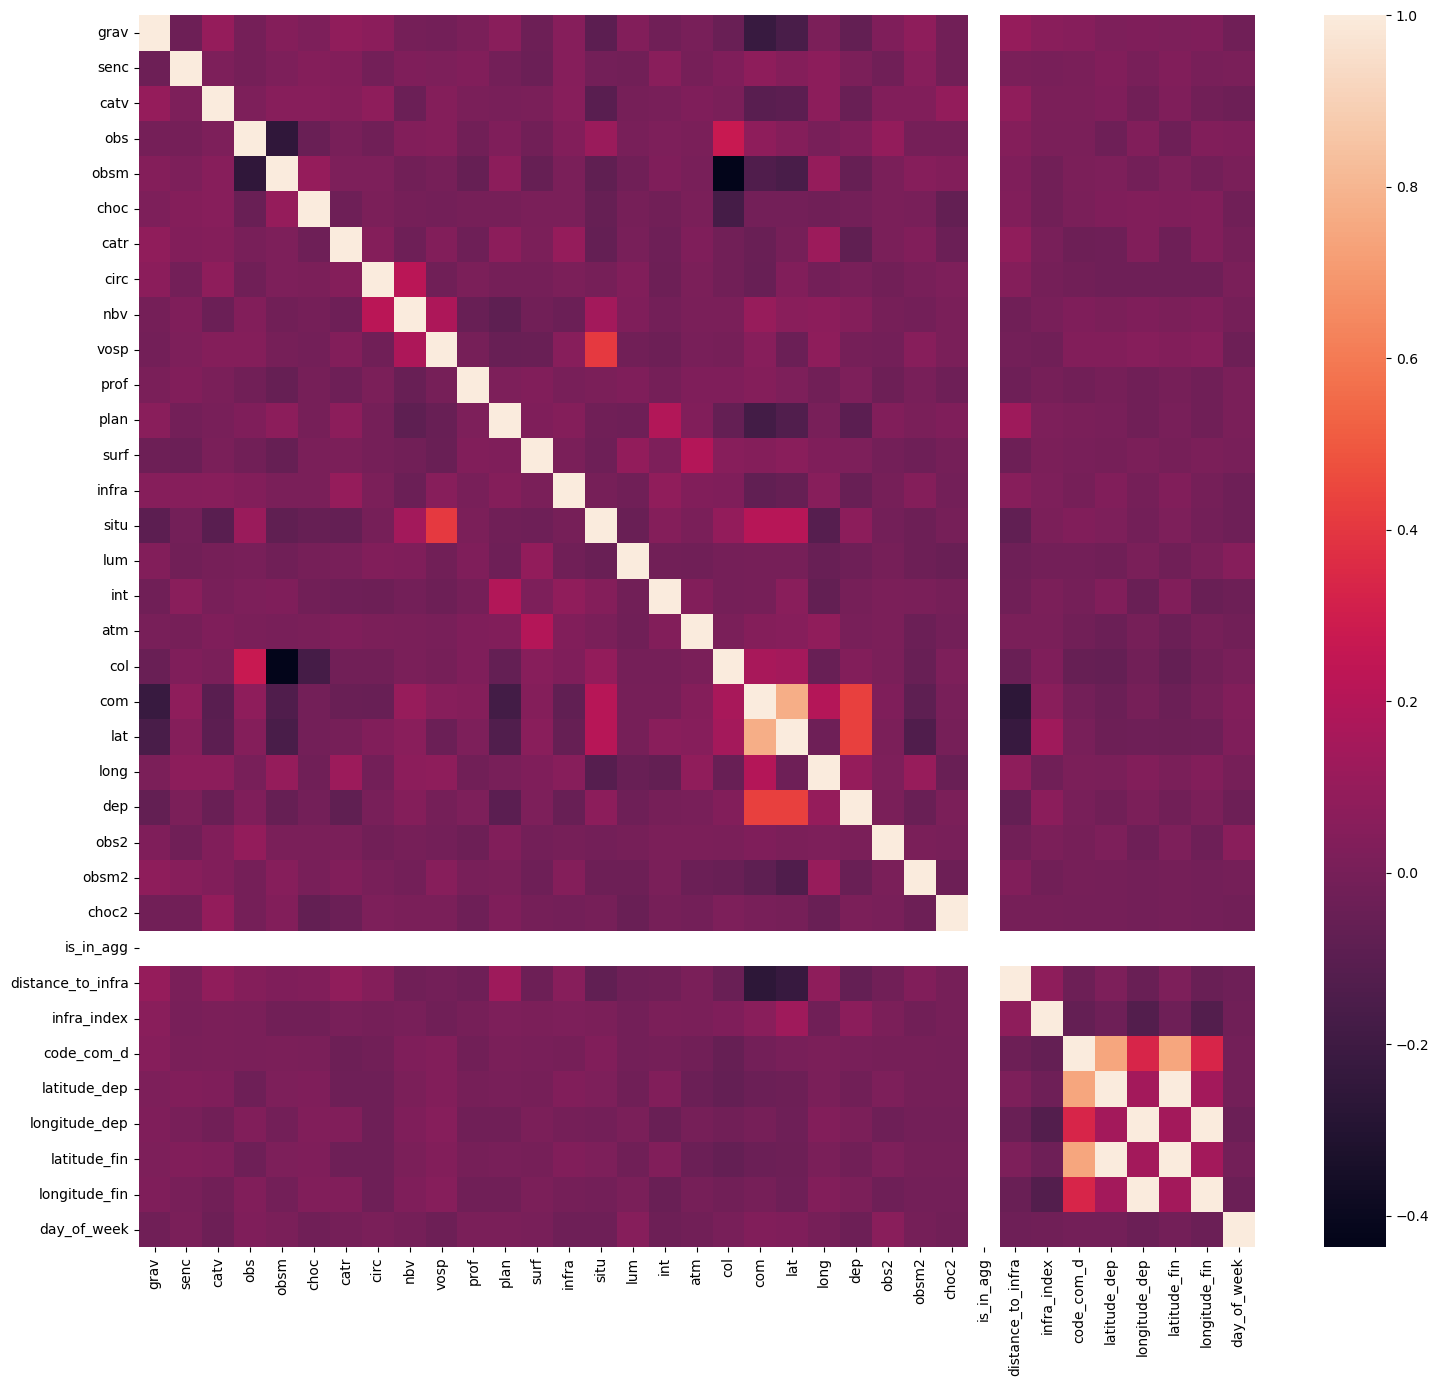

In [6]:
df_copy = df.copy()
corr_df = df_copy.corr(method='pearson')

plt.figure(figsize=(18, 16))
sns.heatmap(corr_df)
plt.show()

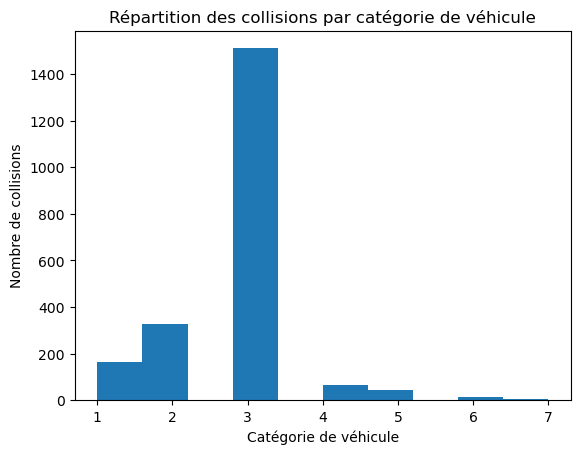

In [7]:
plt.hist(df["catv"], bins=10)
plt.xlabel("Catégorie de véhicule")
plt.ylabel("Nombre de collisions")
plt.title("Répartition des collisions par catégorie de véhicule")
plt.show()

In [8]:
fig = px.density_mapbox(df, lat='lat', lon='long', z='grav',
                        radius=10,
                        center=dict(lat=48.86, lon=2.35),
                        mapbox_style="carto-positron",
                        zoom=5)
fig.show()

In [10]:
# Transformation des dates au fromat datetime
df['date'] = pd.to_datetime(df['date'])

# Filtrage des données pour les 5 dernières années
df = df[df['date'].between('2010-01-01','2020-12-31')]

# Extraction de l'année de la colonne 'date'
df['year'] = df['date'].dt.year

# Agrégation des données par année et gravité
df_agg = df.groupby(['year', 'grav'])['grav'].count().reset_index(name='count')

# Définition des couleurs pour chaque gravité
colors = {1: 'green', 2: 'orange', 3: 'red'}

# Création des trace pour chaque gravité
data = []
for grav in df_agg['grav'].unique():
    df_grav = df_agg[df_agg['grav'] == grav]
    trace = go.Scatter(x=df_grav['year'], y=df_grav['count'], name=f'Gravité {grav}',
                       mode='lines+markers', marker=dict(color=colors[grav]),
                       fill='tozeroy',fillcolor=colors[grav])
    data.append(trace)

# Mise en place de la figure
fig = go.Figure(data=data)
fig.update_layout(title='Evolution du nombre d\'accidents en France sur les 5 dernières années',
                  xaxis_title='Année', yaxis_title='Nombre d\'accidents')

# Affichage de la figure
fig.show()

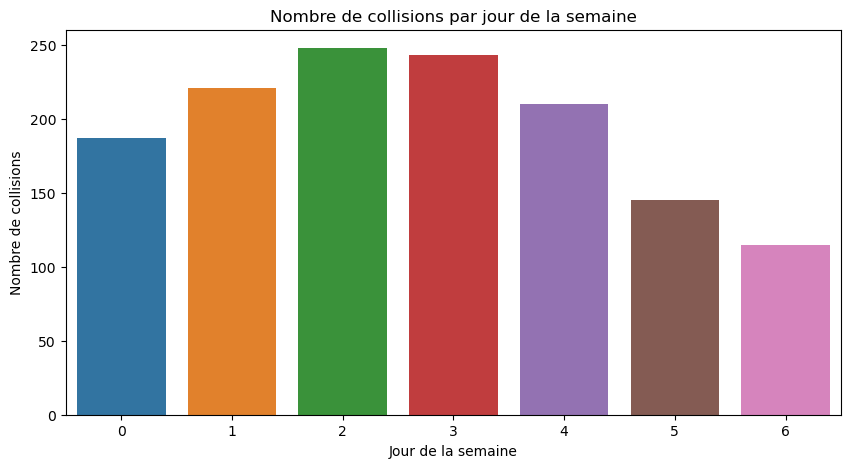

In [11]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.weekday

plt.figure(figsize=(10,5))
sns.countplot(x="day_of_week", data=df)
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de collisions")
plt.title("Nombre de collisions par jour de la semaine")
plt.show()

In [12]:
values = df['catv'].value_counts().values.tolist()
labels = df['catv'].value_counts().index.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text='Répartition des collisions par catégories de véhicules')
fig.show()

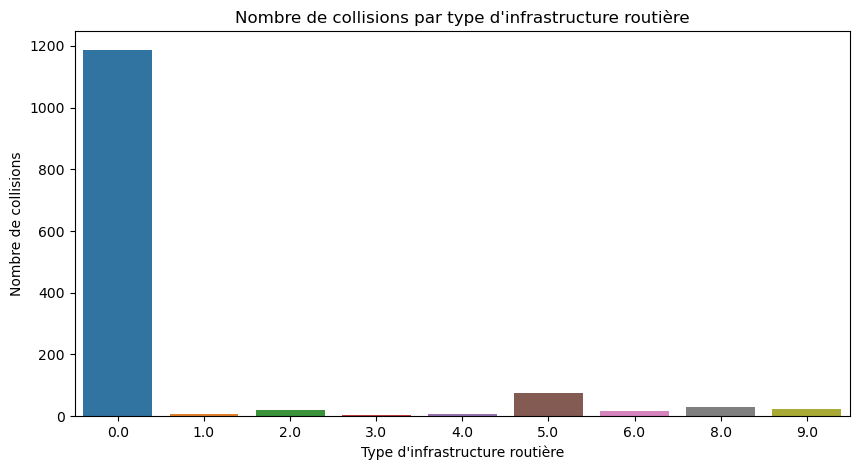

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x="infra", data=df)
plt.xlabel("Type d'infrastructure routière")
plt.ylabel("Nombre de collisions")
plt.title("Nombre de collisions par type d'infrastructure routière")
plt.show()

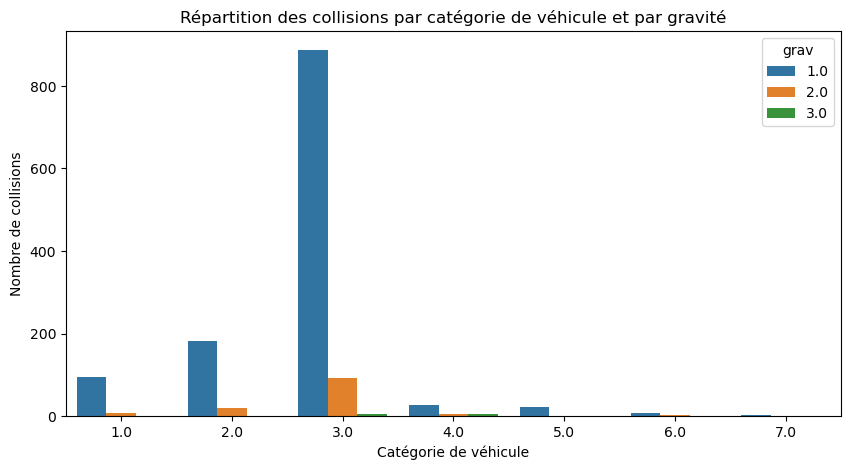

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x="catv",hue="grav", data=df)
plt.xlabel("Catégorie de véhicule")
plt.ylabel("Nombre de collisions")
plt.title("Répartition des collisions par catégorie de véhicule et par gravité")
plt.show()